<a href="https://colab.research.google.com/github/HaithamAlrawahi90/Billing-software/blob/main/Car%26bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [6]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Databse/Car-Bike-Dataset/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Databse/Car-Bike-Dataset/Test'    # Update with your actual path

In [7]:
import os
print(len(os.listdir('/content/drive/MyDrive/Databse/Car-Bike-Dataset/Train/Car')))
print(len(os.listdir('/content/drive/MyDrive/Databse/Car-Bike-Dataset/Train/Bike')))
print(len(os.listdir('/content/drive/MyDrive/Databse/Car-Bike-Dataset/Test/Car')))
print(len(os.listdir('/content/drive/MyDrive/Databse/Car-Bike-Dataset/Test/Bike')))

1176
1033
263
253


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisation / feature scaling
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1766 images belonging to 2 classes.
Found 441 images belonging to 2 classes.


In [11]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [13]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))  #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [15]:
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 473s 8s/step - accuracy: 0.5490 - loss: 0.6767 - val_accuracy: 0.7347 - val_loss: 0.6389
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.8489 - loss: 0.5709 - val_accuracy: 0.6281 - val_loss: 0.6508
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.8945 - loss: 0.5420 - val_accuracy: 0.8503 - val_loss: 0.5531
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 276s 5s/step - accuracy: 0.8875 - loss: 0.5335 - val_accuracy: 0.8526 - val_loss: 0.4427
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.9181 - loss: 0.3964 - val_accuracy: 0.8549 - val_loss: 0.4486
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.9035 - loss: 0.3943 - val_accuracy: 0.8753 - val_loss: 0.4086
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.9517 - loss: 0.3331 - val_accuracy: 0.8821 - val_loss: 0.3928
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.9537 - loss: 0.3172 - val_accuracy: 0.8912 - v

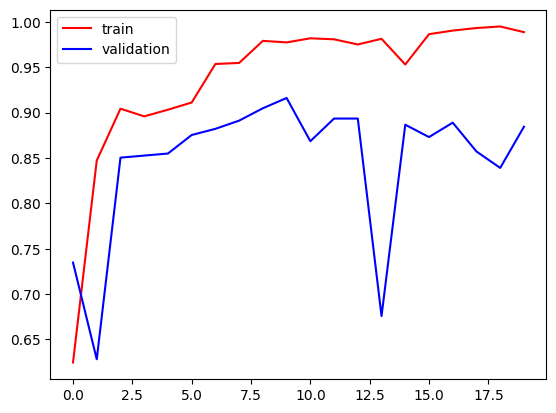

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

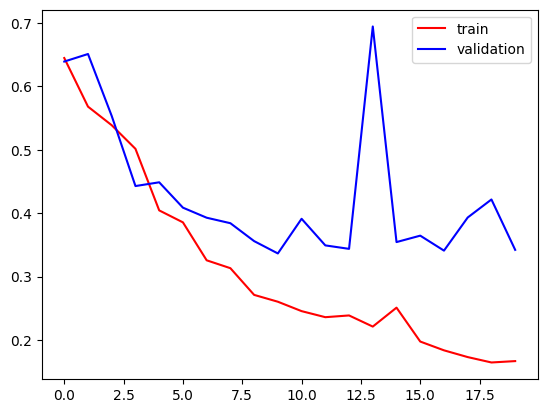

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 514 images belonging to 2 classes.


In [22]:
#predict the test data
predictions = model.predict(test_data)


17/17 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[125 127]
 [122 140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       252
           1       0.52      0.53      0.53       262

    accuracy                           0.52       514
   macro avg       0.52      0.52      0.52       514
weighted avg       0.52      0.52      0.52       514



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [44]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(2,activation='sigmoid'))  #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.4593 - loss: 0.7186 - val_accuracy: 0.4671 - val_loss: 0.7095
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.4650 - loss: 0.7085 - val_accuracy: 0.4671 - val_loss: 0.7038
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.4702 - loss: 0.7020 - val_accuracy: 0.4671 - val_loss: 0.6999
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.4597 - loss: 0.7001 - val_accuracy: 0.4671 - val_loss: 0.6970
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.4736 - loss: 0.6960 - val_accuracy: 0.4671 - val_loss: 0.6953
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.4781 - loss: 0.6943 - val_accuracy: 0.4671 - val_loss: 0.6940
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.4526 - loss: 0.6940 - val_accuracy: 0.5329 - val_loss: 0.6928
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.5372 - loss: 0.6927 - val_accuracy: 0.5329 - v

In [22]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 514 images belonging to 2 classes.


In [23]:
predictions = model.predict(test_data)

17/17 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[  0 252]
 [  0 262]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       252
           1       0.51      1.00      0.68       262

    accuracy                           0.51       514
   macro avg       0.25      0.50      0.34       514
weighted avg       0.26      0.51      0.34       514



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using Pre-trained model - Resnet

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten

# Load ResNet50 without top
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(256,256,3),
                                                  pooling='max',
                                                  weights='imagenet')

# Freeze pretrained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Build new model
resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # ✅ 1 neuron for binary classification

# Compile with binary crossentropy
resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


In [39]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
44/56 ━━━━━━━━━━━━━━━━━━━━ 1:06 6s/step - accuracy: 0.6068 - loss: 2.5652

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 403s 7s/step - accuracy: 0.6332 - loss: 2.2567 - val_accuracy: 0.8163 - val_loss: 0.4643
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 382s 7s/step - accuracy: 0.8285 - loss: 0.4052 - val_accuracy: 0.8685 - val_loss: 0.3284
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 396s 7s/step - accuracy: 0.8929 - loss: 0.2421 - val_accuracy: 0.7574 - val_loss: 0.5929
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 395s 7s/step - accuracy: 0.8609 - loss: 0.3593 - val_accuracy: 0.8685 - val_loss: 0.3119
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 393s 7s/step - accuracy: 0.8884 - loss: 0.2736 - val_accuracy: 0.8186 - val_loss: 0.4255
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 396s 7s/step - accuracy: 0.9276 - loss: 0.1757 - val_accuracy: 0.8617 - val_loss: 0.3384
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 403s 7s/step - accuracy: 0.8998 - loss: 0.2242 - val_accuracy: 0.8685 - val_loss: 0.3099
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 391s 7s/step - accuracy: 0.9242 - loss: 0.1764 - val_accuracy: 0.8435 - val_loss: 0.

In [41]:
predictions = resnet_model.predict(test_data)

17/17 ━━━━━━━━━━━━━━━━━━━━ 105s 6s/step


In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[125 127]
 [122 140]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50       252
           1       0.52      0.53      0.53       262

    accuracy                           0.52       514
   macro avg       0.52      0.52      0.52       514
weighted avg       0.52      0.52      0.52       514

